In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
buoy = 248
SWF="SWFPAC"
website = "CDIP"
max_wave_fn_2020 = "data/{}_open_waters_buoy{}_max_sig_wave_height_{}.csv".format(SWF, buoy, website)
df_2020 = pd.read_csv(max_wave_fn_2020,index_col=0)
df_2020.index = pd.to_datetime(df_2020.index)
df_2020

,wave_height_(m),sea_state
2020-04-01,0.63,3
2020-04-02,0.67,3
2020-04-03,1.65,4
2020-04-04,1.51,4
2020-04-05,0.48,2
...,...,...
2020-10-05,0.74,3
2020-10-06,1.20,3
2020-10-07,1.38,4
2020-10-08,1.27,4


In [30]:
buoy = 46088
SWF="SWFPAC"
website = "NDBC"
max_wave_fn = "data/{}_open_waters_buoy{}_max_sig_wave_height_{}.csv".format(SWF, buoy, website)
df = pd.read_csv(max_wave_fn,index_col=0)
df.index = pd.to_datetime(df.index)
df

,wave_height_(m),sea_state
2004-07-01,0.44,2.0
2004-07-02,6.67,6.0
2004-07-03,0.96,3.0
2004-07-04,1.09,3.0
2004-07-05,0.92,3.0
...,...,...
2019-12-27,0.81,3.0
2019-12-28,0.82,3.0
2019-12-29,0.53,3.0
2019-12-30,0.32,2.0


In [31]:
df.describe()

,wave_height_(m),sea_state
count,5135.000000,5135.000000
mean,0.924230,2.889776
std,1.204542,0.796566
min,0.000000,1.000000
25%,0.420000,2.000000
50%,0.690000,3.000000
75%,1.080000,3.000000
max,16.000000,6.000000


In [32]:
df['Month'] = df.index.month_name().str.slice(0,3)
df

,wave_height_(m),sea_state,Month
2004-07-01,0.44,2.0,Jul
2004-07-02,6.67,6.0,Jul
2004-07-03,0.96,3.0,Jul
2004-07-04,1.09,3.0,Jul
2004-07-05,0.92,3.0,Jul
...,...,...,...
2019-12-27,0.81,3.0,Dec
2019-12-28,0.82,3.0,Dec
2019-12-29,0.53,3.0,Dec
2019-12-30,0.32,2.0,Dec


In [35]:
df_2020['Month'] = df_2020.index.month_name().str.slice(0,3) + "2020"
df_2020

,wave_height_(m),sea_state,Month
2020-04-01,0.63,3,Apr2020
2020-04-02,0.67,3,Apr2020
2020-04-03,1.65,4,Apr2020
2020-04-04,1.51,4,Apr2020
2020-04-05,0.48,2,Apr2020
...,...,...,...
2020-10-05,0.74,3,Oct2020
2020-10-06,1.20,3,Oct2020
2020-10-07,1.38,4,Oct2020
2020-10-08,1.27,4,Oct2020


In [20]:
# for select months
months_for_comparison = ['Apr2020', 'May2020', 'Apr', 'May']
df_months_comparison = df.loc[df["Month"].isin(months_for_comparison)]
df_months_comparison_2020 = df_2020.loc[df_2020["Month"].isin(months_for_comparison)]
df_months_comparison = pd.concat([df_months_comparison, df_months_comparison_2020])
print(df_months_comparison.head())
print(f_months_comparison.shape)
print(df_months_comparison_2020.shape)

,wave_height_(m),sea_state,Month
date_time,,,
2005-04-01,0.524256,3.0,Apr
2005-04-02,0.396240,2.0,Apr
2005-04-03,0.780288,3.0,Apr
2005-04-04,0.259080,2.0,Apr
2005-04-05,0.594360,3.0,Apr
...,...,...,...
2020-05-27,1.020000,3.0,2020May
2020-05-28,0.640000,3.0,2020May
2020-05-29,2.190000,4.0,2020May


In [36]:
# for all months
list_of_months_to_drop = ["Dec", "Feb", "Jan", "Mar", "Nov"]
df_filtered = df[~df["Month"].isin(list_of_months_to_drop)]
df_months_comparison = pd.concat([df_filtered, df_2020])
df_months_comparison_sorted = df_months_comparison.sort_values(by=["Month"])
df_months_comparison

,wave_height_(m),sea_state,Month
2004-07-01,0.44,2.0,Jul
2004-07-02,6.67,6.0,Jul
2004-07-03,0.96,3.0,Jul
2004-07-04,1.09,3.0,Jul
2004-07-05,0.92,3.0,Jul
...,...,...,...
2020-10-05,0.74,3.0,Oct2020
2020-10-06,1.20,3.0,Oct2020
2020-10-07,1.38,4.0,Oct2020
2020-10-08,1.27,4.0,Oct2020


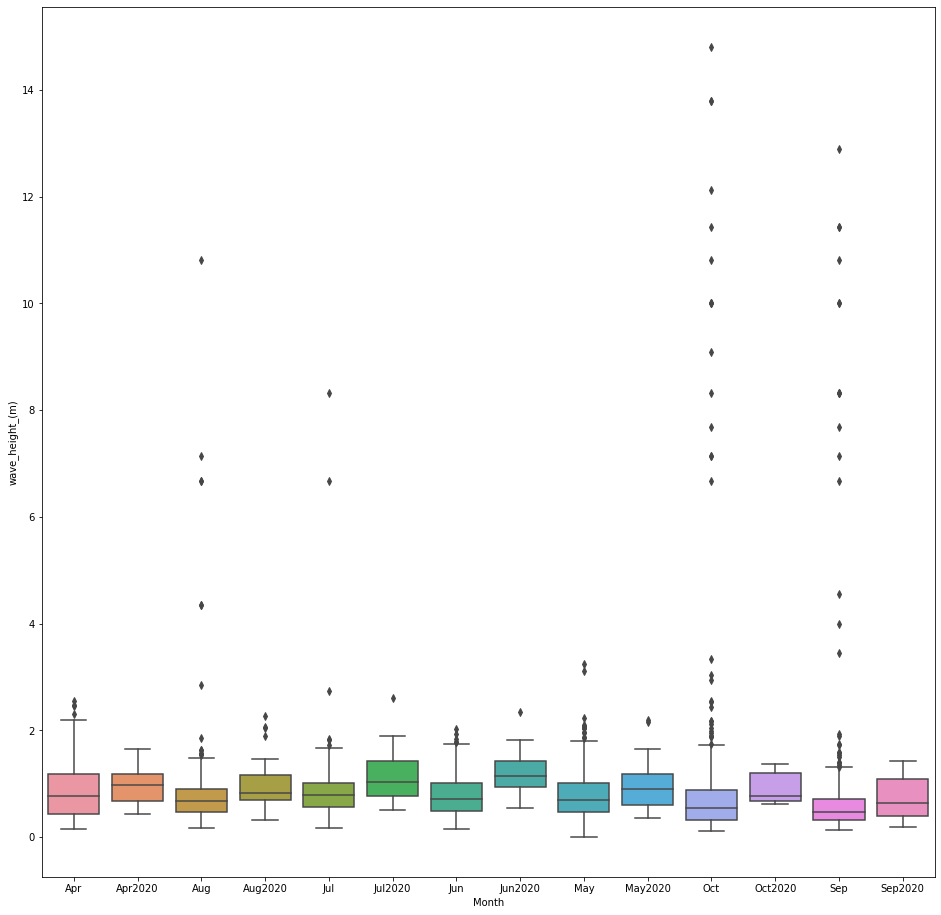

In [40]:
box_whisker_fn = "figures/SWFPAC_buoy{}_wave_height.png".format("combined_comparison")
y = "wave_height_(m)"
x = "Month"
plt.figure(figsize=(16,16,))
ax = sns.boxplot(x=x, y=y, data=df_months_comparison_sorted)
# ax = sns.swarmplot(x=x, y=y, data=df, color='grey') 
plt.savefig(box_whisker_fn, dpi=600)

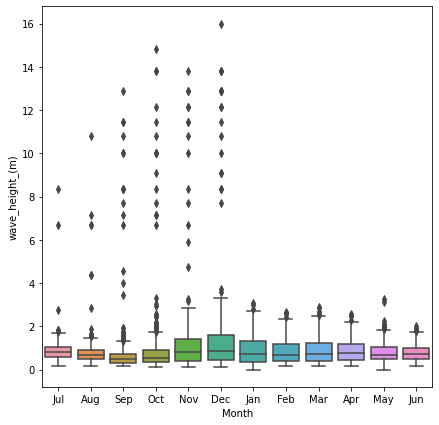

In [38]:
buoy=46088
box_whisker_fn = "figures/SWFPAC_buoy{}_wave_height.png".format(buoy)
y = "wave_height_(m)"
x = "Month"
plt.figure(figsize=(7,7,))
ax = sns.boxplot(x=x, y=y, data=df)
# ax = sns.swarmplot(x=x, y=y, data=df, color='grey') 
plt.savefig(box_whisker_fn, dpi=600)

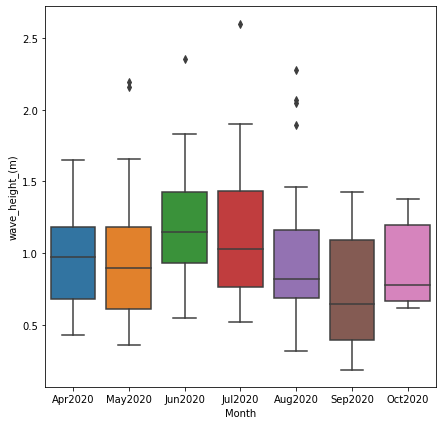

In [39]:
buoy=248
box_whisker_fn = "figures/SWFPAC_buoy{}_wave_height.png".format(buoy)
y = "wave_height_(m)"
x = "Month"
plt.figure(figsize=(7,7,))
ax = sns.boxplot(x=x, y=y, data=df_2020)
# ax = sns.swarmplot(x=x, y=y, data=df, color='grey') 
plt.savefig(box_whisker_fn, dpi=600)